<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Underscorify_Substring_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Underscorify Substring

Write a function that takes in two strings: a main string and a potential substring of the main string. The function should return a version of the main string with every instance of the substring in it wrapped between underscores.

If two or more instances of the substring in the main string overlap each other or sit side by side, the underscores relevant to these substrings should only appear on the far left of the leftmost substring and on the far right of the rightmost substring. If the main string doesn't contain the other string at all, the function should return the main string intact.

Sample Input

```
string = "testthis is a testtest to see if testestest it works"
substring = "test"
```



Sample Output

```
"_test_this is a _testtest_ to see if _testestest_ it works"# 
```



# Solution 1

In [1]:
# Time O(n*m)
# Space O(n)
# n = len(string)
# m = len(substring)

def underscorifySubstring(string, substring):
  main_idx = 0
  end_idx = None
  start_idx = None
  output_string = []
  open_underscore = False

  while main_idx <= len(string):
    substring_idx = 0
    while substring_idx <= len(substring) - 1 and main_idx + substring_idx <= len(string) - 1 \
          and string[main_idx + substring_idx] == substring[substring_idx]:
      if substring_idx == len(substring) - 1:
        if end_idx == None:
          start_idx = main_idx
          open_underscore = True
        end_idx = main_idx + substring_idx
      substring_idx += 1

    # open
    if open_underscore == True:
      output_string.append("_")
      open_underscore = False

    # end
    if end_idx != None and main_idx == end_idx + 1 and open_underscore == False:
      while start_idx <= end_idx:
        output_string.append(string[start_idx])
        start_idx +=1
      output_string.append("_")
      end_idx = None

    # normal
    if end_idx == None and main_idx <= len(string) - 1:
      output_string.append(string[main_idx])

    main_idx += 1

  return ''.join(output_string)

In [2]:
string = "testthis is a testtest to see if testestest it works"
substring = "test"
underscorifySubstring(string, substring)

'_test_this is a _testtest_ to see if _testestest_ it works'

In [3]:
string = "this is a test to see if it works and test"
substring = "test"
underscorifySubstring(string, substring)

'this is a _test_ to see if it works and _test_'

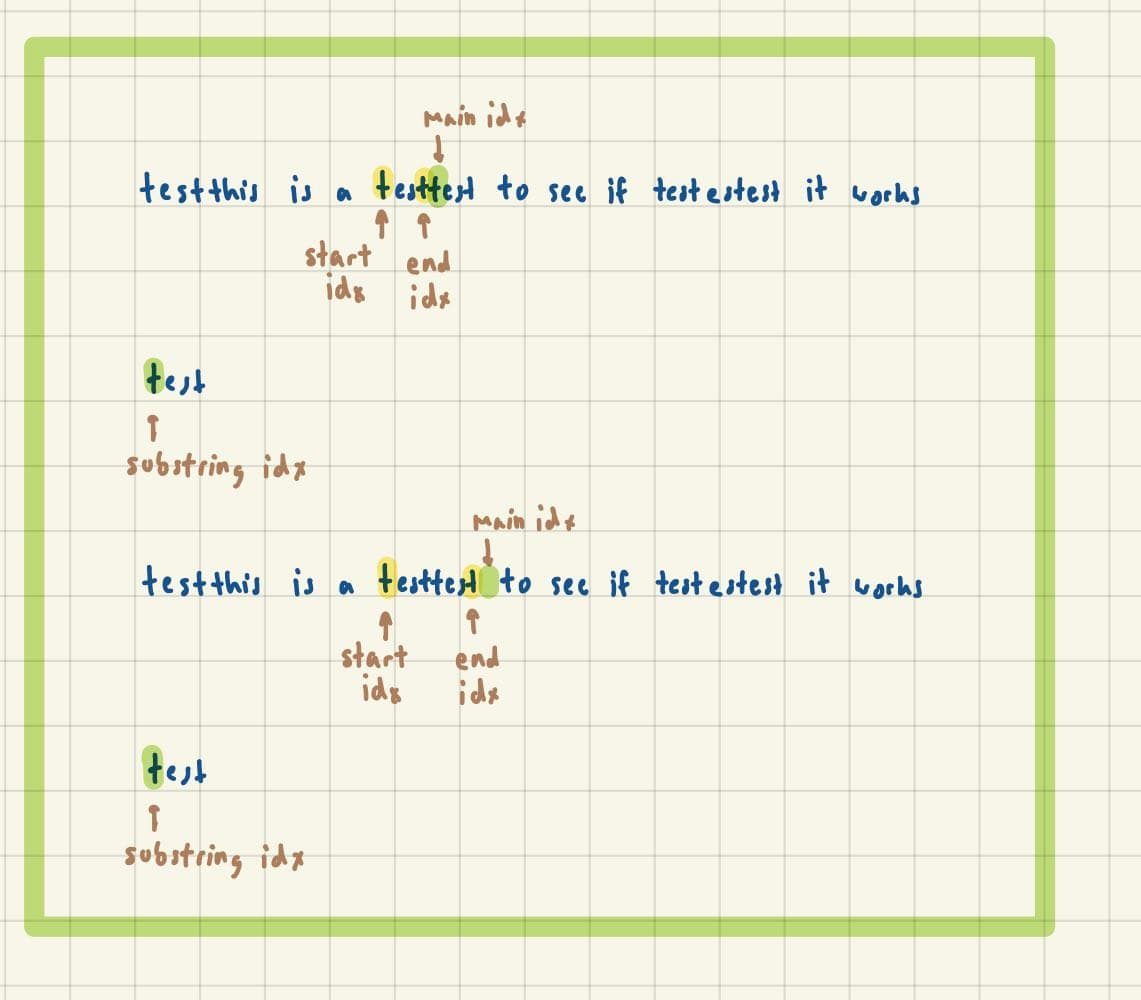

# Solution 2

In [4]:
# Time O(n*m)
# Space O(n)
# n = len(string)
# m = len(substring)

def underscorifySubstring(string, substring):
  locations = collapse(get_locations(string, substring))
  return underscorify(string, locations)

def get_locations(string, substring):
  locations = []
  start_idx = 0
  while start_idx < len(string):
    next_idx = string.find(substring, start_idx)
    if next_idx != -1:
      locations.append([next_idx, next_idx + len(substring)])
      start_idx = next_idx + 1
    else:
      break
  return locations

def collapse(locations):
  if len(locations) == 0:
    return locations
  new_locations = [locations[0]]
  for i in range(1, len(locations)):
    current = locations[i]
    previous = new_locations[-1]
    if current[0] <= previous[1]:
      previous[1] = current[1]
    else:
      new_locations.append(current)
  return new_locations

def underscorify(string, locations):
  location_idx = 0
  string_idx = 0
  in_between_underscores = False
  final_chars = []
  i = 0
  while string_idx <= len(string) - 1 and location_idx <= len(locations) - 1:
    if string_idx == locations[location_idx][i]:
      final_chars.append("_")
      if in_between_underscores == True:
        in_between_underscores = False
        location_idx += 1
        i = 0
      else:
        in_between_underscores = True
        i = 1
    final_chars.append(string[string_idx])
    string_idx +=1

  if location_idx <= len(locations) - 1:
    final_chars.append("_")
  if string_idx <= len(string) - 1:
    final_chars.append(string[string_idx:])

  return ''.join(final_chars)

In [5]:
string = "testthis is a testtest to see if testestest it works"
substring = "test"
underscorifySubstring(string, substring)

'_test_this is a _testtest_ to see if _testestest_ it works'

In [6]:
string = "this is a test to see if it works and test"
substring = "test"
underscorifySubstring(string, substring)

'this is a _test_ to see if it works and _test_'

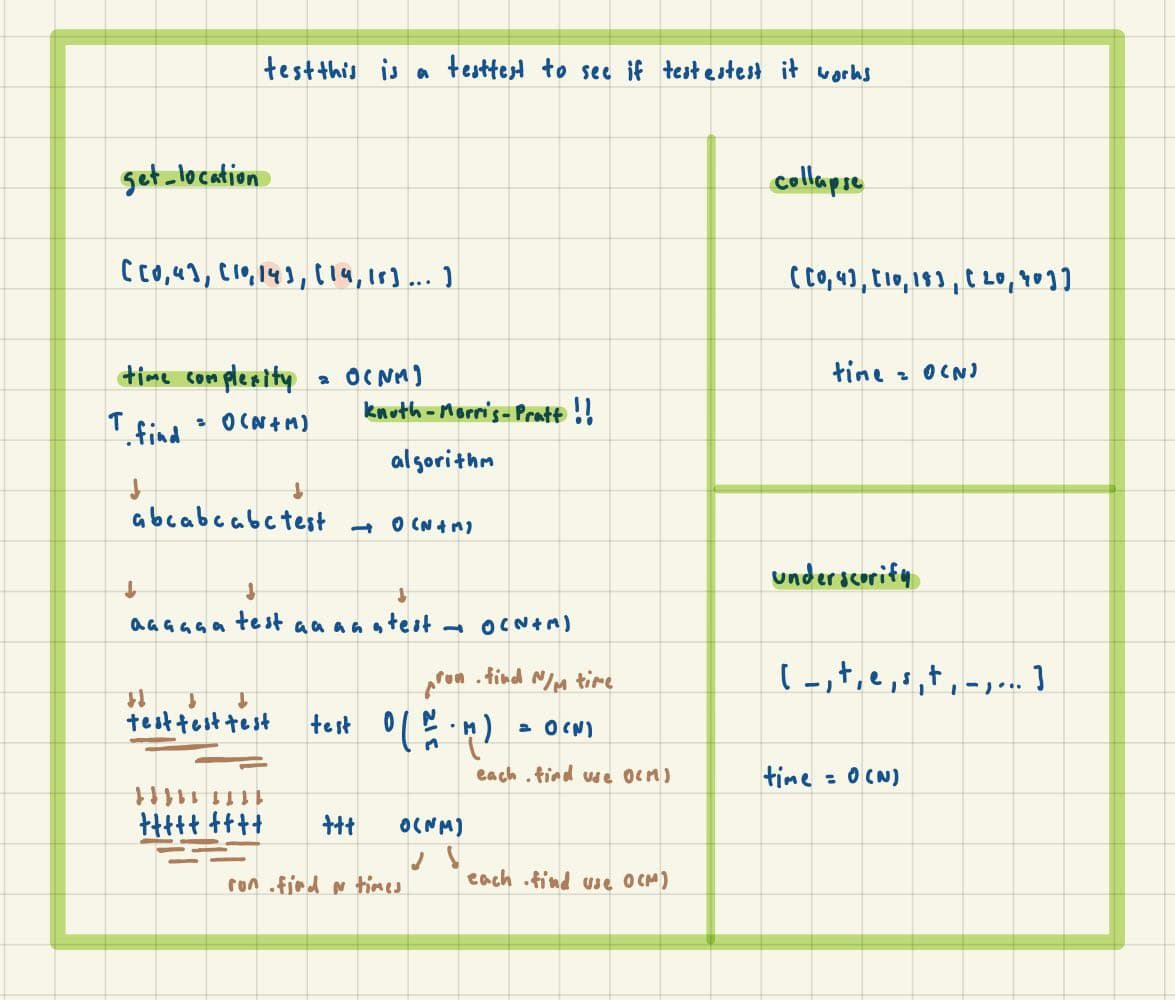